In [315]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import load_svmlight_file

In [316]:
def get_data(str):
    data = load_svmlight_file(str,123)
    return data[0], data[1]

#Import data
train = 'data\\a9a'
test = 'data\\a9a.t'
X_train, y_train = get_data(train)
X_test, y_test = get_data(test)

In [317]:
def selectData(X,Y,size):
    data = []
    per = np.random.permutation(X.shape[1])
    shuffled_X = X[:,per]
    shuffled_Y = Y[:,per]
    num_frag = math.floor(X.shape[1]/size)
    for i in range(num_frag):
        data_X = shuffled_X[:,i*size:(i+1)*size]
        data_Y = shuffled_Y[:,i*size:(i+1)*size]
        a = (data_X, data_Y)
        data.append(a)
    if X.shape[1] % size != 0:
        data_X = shuffled_X[:,num_frag*size:X.shape[1]]
        data_Y = shuffled_Y[:,num_frag*size:X.shape[1]]
        a = (data_X, data_Y)
        data.append(a)
    
    return data

In [318]:
def cost(W,X,Y):
    Hx = 1/(1+np.exp(-np.dot(W.T,X)))
    cost = (np.dot(Y,np.log(Hx).T)+np.dot((1-Y),np.log(1-Hx).T))/(-X.shape[1])
    cost = np.squeeze(cost)
    return cost

In [319]:
def loss(W,X,Y):
    Hx = 1/(1+np.exp(-np.dot(W.T,X)))
    GW = np.dot(X,(Hx-Y).T)/X.shape[1]
    return GW

In [320]:
def main(X_train, y_train, X_test, y_test, method):
    lenrate = 0.001
    n = 100
    validCost = []
    W = np.zeros((X_train.shape[0],1))
    vW = 0
    vb = 0
    r = 0.9
    decay_rate = 0.9
    cache = 0
    eps = 1e-8
    m = 0
    v = 0
    beta1 = 0.9
    beta2 = 0.999
    rA = 0.95
    diffdireW = 0
    direW = 0
    gW = 0
    for i in range(n):
        datas = selectData(X_train, y_train, 1000)
        for data in datas:
            (X_sel, Y_sel) = data
            GW = loss(W,X_sel,Y_sel)
            if method is "NAG":
                v_prev = vW
                vW = r*vW-lenrate*GW
                W += -r*v_prev+(1+r)*vW
            elif method is "RMSProp":
                cache = decay_rate * cache + (1 - decay_rate) * GW**2
                W += - lenrate * GW / (np.sqrt(cache) + eps)
            elif method is "Adam":
                t = i + 1
                m = beta1*m + (1-beta1)*GW
                mt = m / (1-beta1**t)
                v = beta2*v + (1-beta2)*(GW**2)
                vt = v / (1-beta2**t)
                W += - lenrate * mt / (np.sqrt(vt) + eps)
            elif method is "AdaDelta":
                gW = rA*gW+(1-rA)*GW**2
                diffdireW = -np.sqrt(direW+eps)/np.sqrt(gW+eps)*GW
                W += diffdireW
                direW = rA*direW+(1-rA)*diffdireW**2
        validcost = cost(W,X_test,y_test)
        validCost.append(validcost)
    return validCost

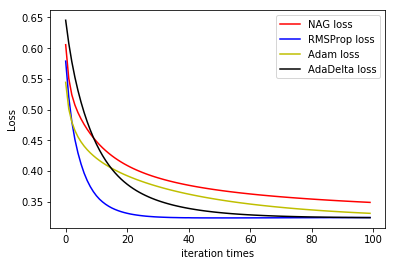

In [321]:
X_train = X_train.T.toarray()
X_test = X_test.T.toarray()
y_train = np.reshape(y_train,(1,y_train.shape[0]))
y_test = np.reshape(y_test,(1,y_test.shape[0]))
y_train[y_train<0]=0
y_test[y_test<0]=0
n=100
NAGvaild = main(X_train,y_train,X_test,y_test,method = 'NAG')
RMSvaild = main(X_train,y_train,X_test,y_test,method = 'RMSProp')
Adamvaild = main(X_train,y_train,X_test,y_test,method = 'Adam')
AdaDeltavaild = main(X_train,y_train,X_test,y_test,method = 'AdaDelta')
plt.figure(1)
x = np.arange(0, n, 1)
plt.xlabel('iteration times')
plt.ylabel('Loss')
plt.plot(x,NAGvaild,color="r",label = "NAG loss")
plt.plot(x,RMSvaild,color="b",label = "RMSProp loss")
plt.plot(x,Adamvaild,color="y",label = "Adam loss")
plt.plot(x,AdaDeltavaild,color="k",label = "AdaDelta loss")
plt.legend(loc='upper right')
plt.show()

